In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [65]:
df = pd.read_csv("OnlineNewsPopularity_trimmed.csv")
df = df.drop([31037, 16281, 16294, 16268], axis = 0)
max_share_limit = 400000
df = df.drop(df[df["shares"] > max_share_limit].index, axis = 0)
df = df.drop(df[df["num_hrefs"] > 300].index, axis = 0)
df = df.drop(df[df["self_reference_min_shares"] > 400000].index, axis = 0)
df = df.drop(df[df["self_reference_max_shares"] > 400000].index, axis = 0)
df = df.drop(df[df["self_reference_avg_sharess"] > 400000].index, axis = 0)
df = df.drop(["url"], axis = 1)
df = df.drop(["n_non_stop_words"], axis = 1)
df = df.drop(df[df["average_token_length"] ==0].index, axis = 0)
#df = df[:10000]

In [66]:
df_weekdays = df[["weekday_is_monday", "weekday_is_tuesday", "weekday_is_wednesday", "weekday_is_thursday", "weekday_is_friday", "weekday_is_saturday", "weekday_is_sunday"]]
df["weekdays"] = pd.from_dummies(df_weekdays, sep = "_is_")

In [67]:
channel = df[["data_channel_is_lifestyle", "data_channel_is_entertainment", "data_channel_is_bus", "data_channel_is_socmed", "data_channel_is_tech", "data_channel_is_world"]]
df["channel"] = pd.from_dummies(channel, sep = "_is_", default_category="none")

In [68]:
df["shares_log"] = np.log1p(df['shares'])

In [6]:
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,weekdays,channel,shares_log
0,731,12,219,0.663594,0.815385,4,2,1,0,4.680365,...,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,monday,entertainment,9.211888
1,731,9,255,0.604743,0.791946,3,1,1,0,4.913725,...,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,monday,bus,9.473706
2,731,9,211,0.575130,0.663866,3,1,1,0,4.393365,...,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,monday,bus,10.550747
3,731,9,531,0.503788,0.665635,9,0,1,0,4.404896,...,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,monday,entertainment,10.228819
4,731,13,1072,0.415646,0.540890,19,19,20,0,4.682836,...,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,monday,tech,8.980140


count     38338.000000
mean       3249.038161
std        8142.924027
min           1.000000
25%         944.000000
50%        1400.000000
75%        2700.000000
max      310800.000000
Name: shares, dtype: float64

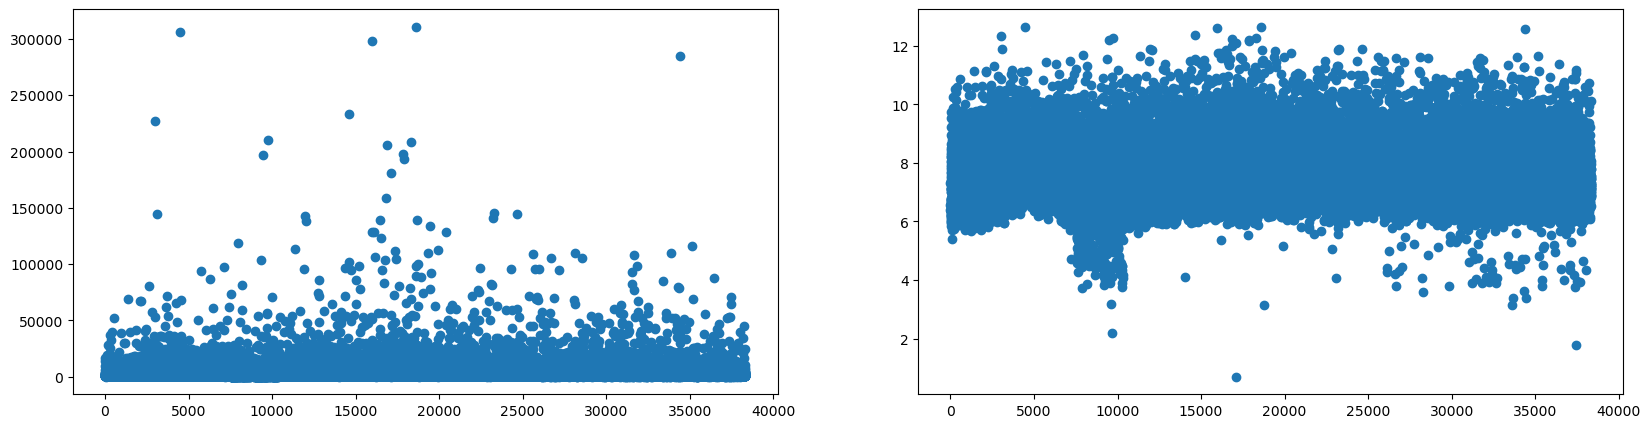

In [69]:
plt.figure(figsize=(20,5))
plt.subplot(1,2, 1)
plt.scatter(range(len(df)), df["shares"])
plt.subplot(1,2, 2)
plt.scatter(range(len(df)), np.log1p(df['shares']))

df["shares"].describe()

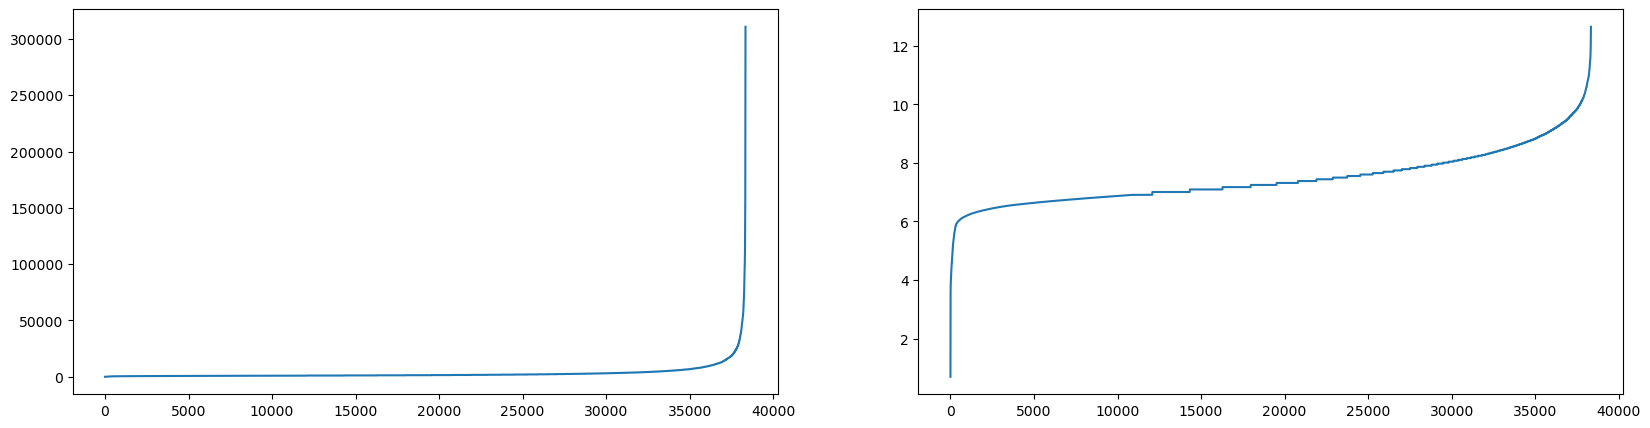

In [70]:
plt.figure(figsize=(20,5))
plt.subplot(1,2, 1)
plt.plot(np.sort(df['shares']))
plt.subplot(1,2, 2)
plt.plot(np.sort(np.log1p(df['shares'])))

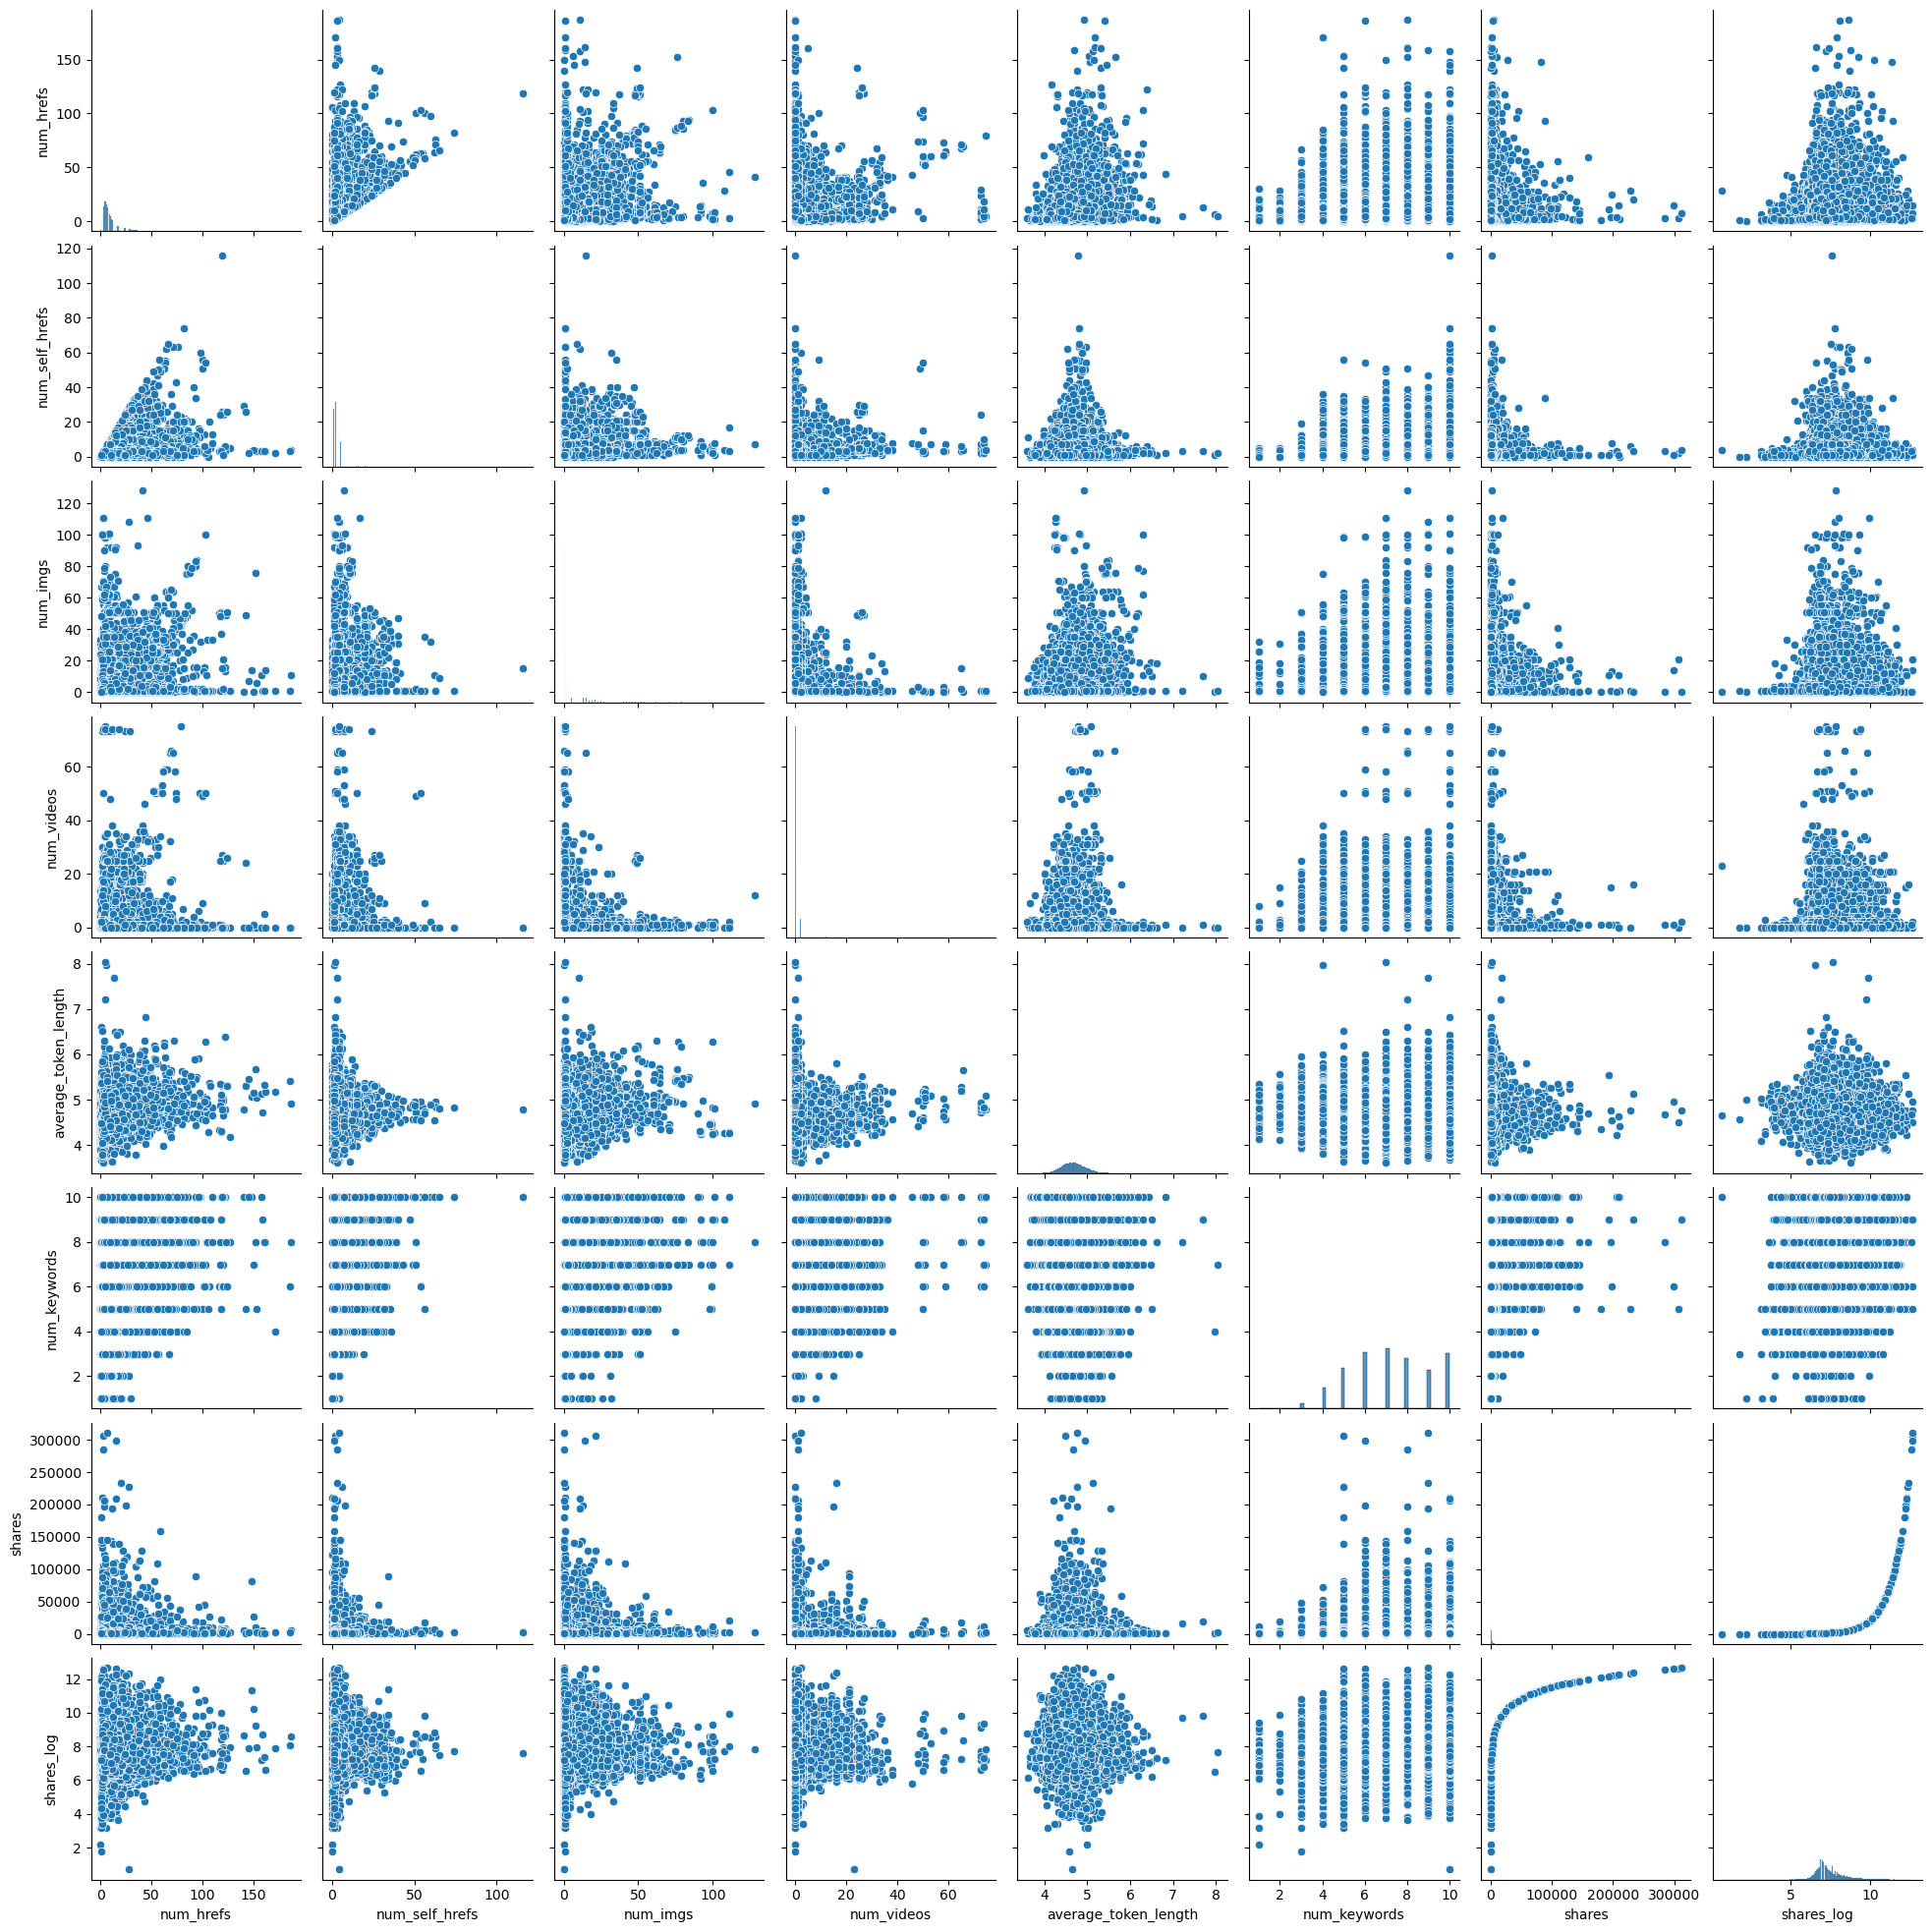

In [71]:
num = ["num_hrefs", "num_self_hrefs", "num_imgs", "num_videos", "average_token_length", "num_keywords", "shares", "shares_log"]
sns.pairplot(df, vars=num)

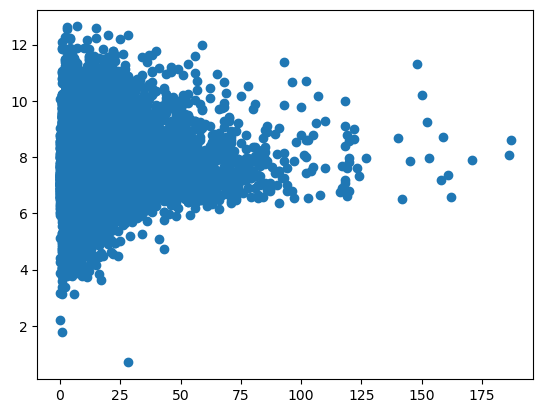

In [72]:
plt.scatter( df["num_hrefs"], df["shares_log"])

In [73]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [74]:
X = pd.DataFrame(df["num_hrefs"], columns=["num_hrefs"])
y = df["shares_log"]
lrobj = LinearRegression()
lrobj.fit(X, y)

LinearRegression()

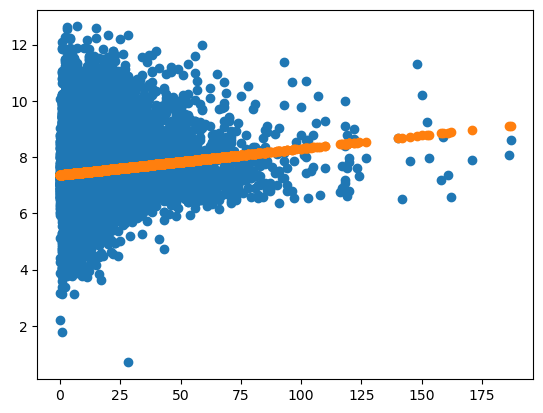

In [94]:
plt.scatter( df["num_hrefs"], df["shares_log"])
plt.scatter(x = df["num_hrefs"], y = lrobj.predict(X))

In [112]:
probj = PolynomialFeatures(degree=2)
transformed_X = probj.fit_transform(X)
lrobj_poly = LinearRegression()
lrobj_poly.fit(transformed_X, y)

LinearRegression()

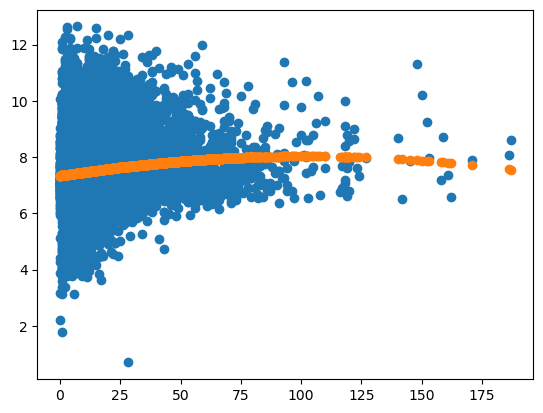

In [113]:
plt.scatter( df["num_hrefs"], df["shares_log"])
plt.scatter(x = df["num_hrefs"], y = lrobj_poly.predict(transformed_X))

(array([  118.,   958.,  4693., 12802.,  8690.,  6952.,  3102.,   760.,
          229.,    34.]),
 array([0.        , 0.5236442 , 1.04728839, 1.57093259, 2.09457679,
        2.61822098, 3.14186518, 3.66550937, 4.18915357, 4.71279777,
        5.23644196]),
 <BarContainer object of 10 artists>)

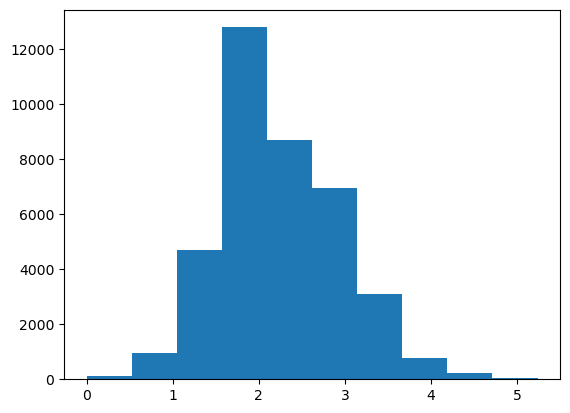

In [121]:
plt.hist(np.log1p(df["num_hrefs"]))

{'whiskers': [<matplotlib.lines.Line2D at 0x275bd4b2fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x275bd4c0290>,
 'boxes': [<matplotlib.lines.Line2D at 0x275bd1a0a50>],
 'medians': [<matplotlib.lines.Line2D at 0x275bd4c12d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x275bd41cb50>],
 'means': []}

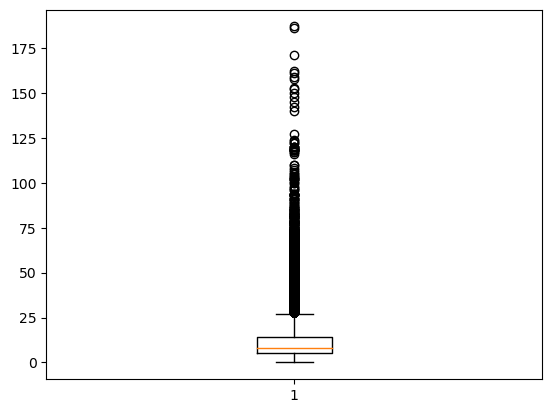

In [116]:
plt.boxplot(df["num_hrefs"])

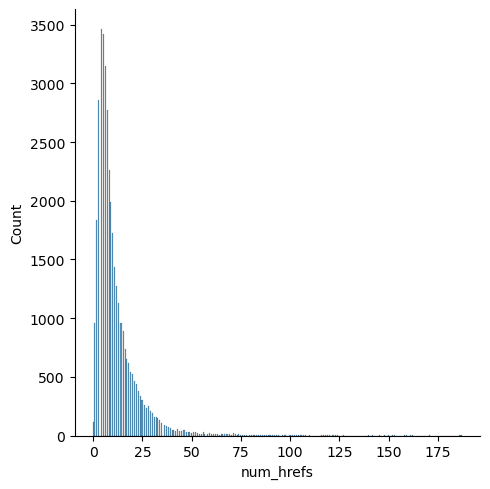

In [123]:
sns.displot(df["num_hrefs"])

<Axes: xlabel='shares_log'>

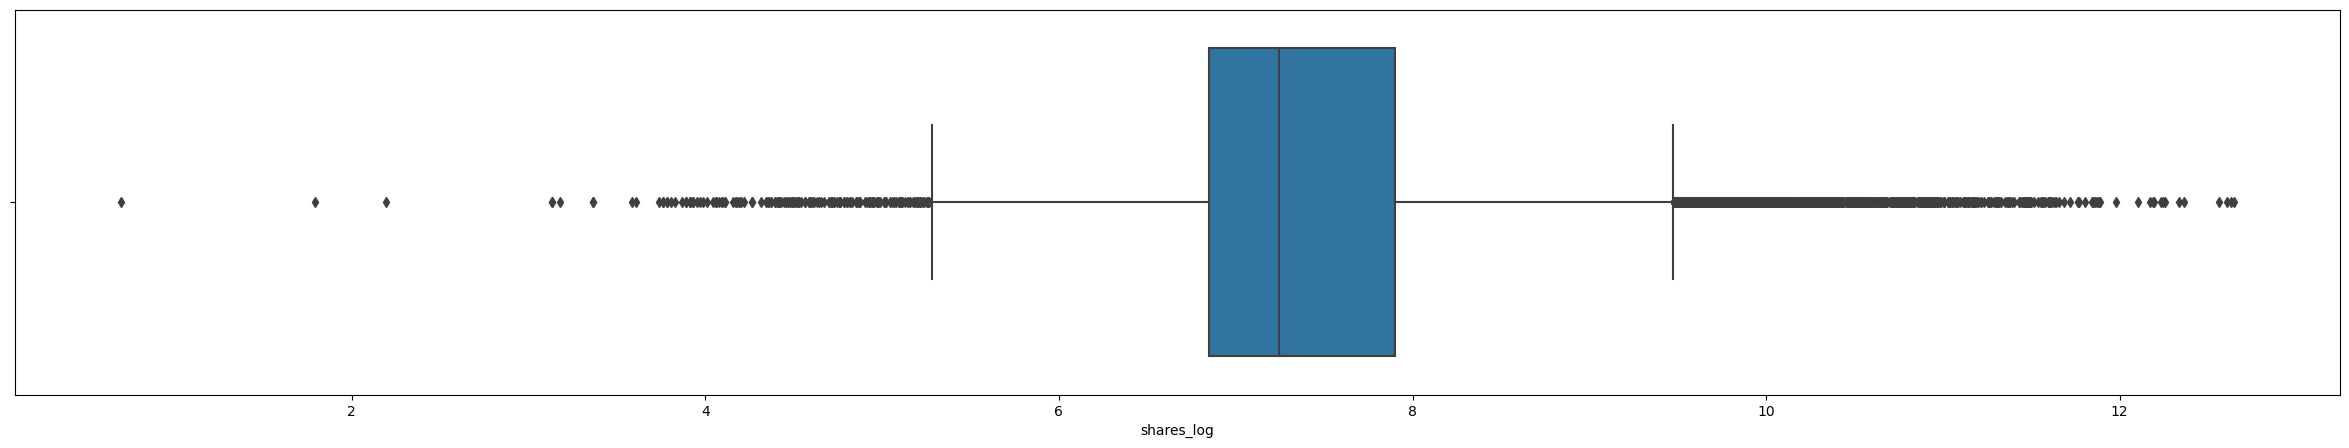

In [139]:
plt.figure(figsize=(30,5))
sns.boxplot(data = df, x = "shares_log")

In [181]:
df["shares"].describe()

count     38338.000000
mean       3249.038161
std        8142.924027
min           1.000000
25%         944.000000
50%        1400.000000
75%        2700.000000
max      310800.000000
Name: shares, dtype: float64

In [180]:
df_new = df[(df["shares_log"] > 5.5) & (df["shares_log"] < 9.1)]
df_new["shares"].describe()

count    35722.000000
mean      1957.483512
std       1607.032815
min        245.000000
25%        927.000000
50%       1400.000000
75%       2300.000000
max       8900.000000
Name: shares, dtype: float64

<Axes: xlabel='shares_log'>

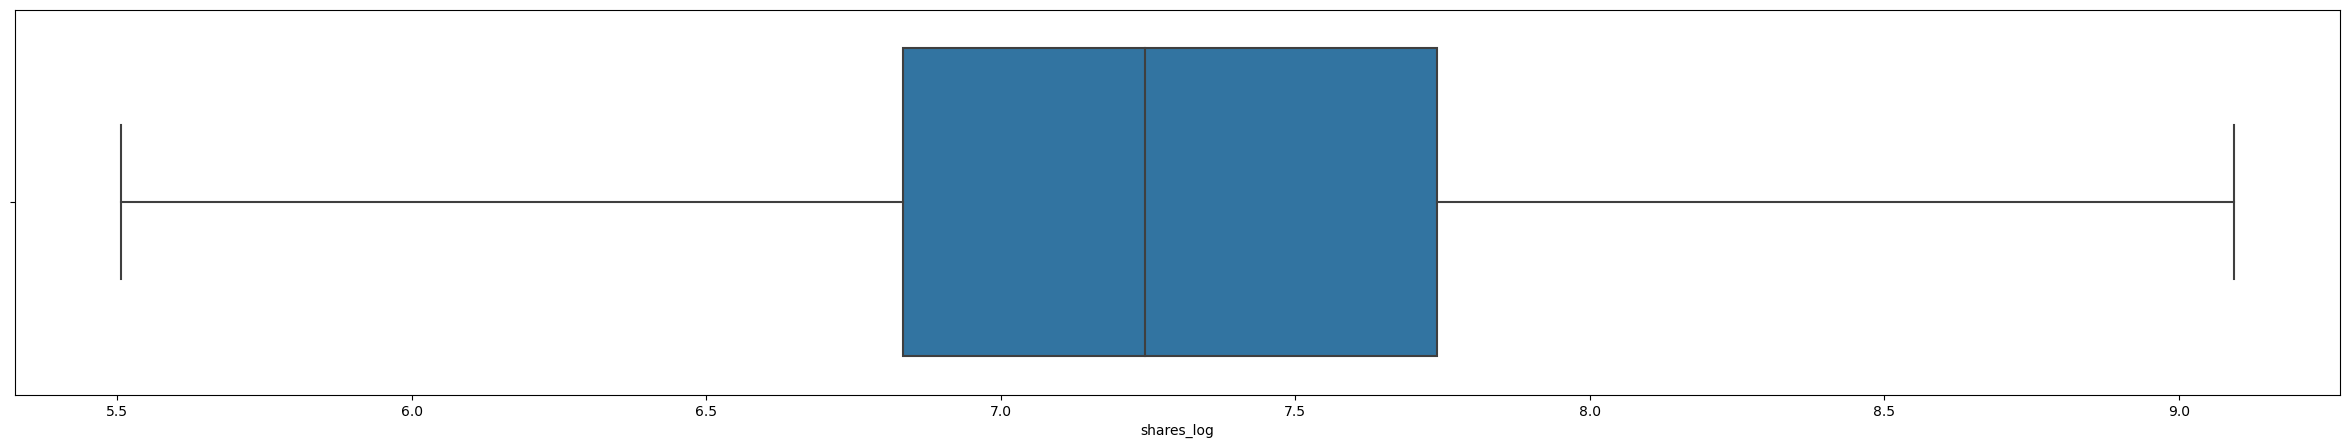

In [175]:
plt.figure(figsize=(30,5))
sns.boxplot(data = df_new, x = "shares_log")

<Axes: ylabel='shares_log'>

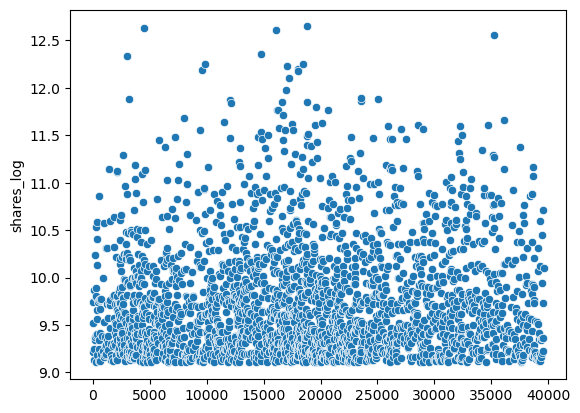

In [186]:
df_upper = df[(df["shares_log"] > 9.1)]
sns.scatterplot(df_upper["shares_log"])